In [2]:
import pandas as pd

df_TDW = pd.read_csv('/Users/holliknight/DeadWeather.csv')
df_Rac = pd.read_csv('/Users/holliknight/Desktop/TheRaconteurs.csv')
df_CW = pd.read_csv('/Users/holliknight/CelticWoman.csv')

In [3]:
df_TDW['who'] = 0
df_CW['who'] = 1
df_Rac['who'] = 2

In [4]:
df_both = df_TDW.append(df_CW)
df_both.reset_index(inplace= True)
df_both.drop('index', axis = 1, inplace= True)

In [5]:
df_all = df_both.append(df_Rac)
df_all.reset_index(inplace= True)
df_all.drop('index', axis = 1, inplace= True)

In [6]:
def features(df,who):
    if who == 'all':
         features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'who']]         
    elif who == 0 or who == 1 or who ==2:   
          features = df.loc[df.who == who,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]           
    else:
        return 'Error'
    return features

In [7]:
features_TDW = features(df_all, 0)
features_CW = features(df_all,1)
features_Rac = features(df_all,2)

features_TDW.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.00237,0.245,0.861,0.000000,0.1170,0.1280,0.276
1,0.00463,0.580,0.878,0.000088,0.1980,0.0650,0.559
2,0.09100,0.572,0.530,0.000143,0.0982,0.0600,0.454
3,0.01410,0.506,0.832,0.000035,0.1370,0.0403,0.141
4,0.04780,0.291,0.800,0.000019,0.0807,0.0826,0.552


In [8]:
features_CW.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
80,0.914,0.360,0.324,0.000029,0.0943,0.0338,0.5020
81,0.863,0.432,0.326,0.000000,0.4610,0.0285,0.3020
82,0.887,0.301,0.315,0.000002,0.2010,0.0303,0.0567
83,0.862,0.328,0.350,0.000033,0.2100,0.0322,0.7220
84,0.863,0.170,0.322,0.000067,0.1400,0.0327,0.1060


In [9]:
features_Rac.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
493,0.000439,0.320,0.947,0.009450,0.1130,0.3340,0.0753
494,0.032100,0.500,0.783,0.000079,0.0853,0.0643,0.1890
495,0.051200,0.590,0.519,0.003110,0.1410,0.0259,0.3620
496,0.001880,0.290,0.906,0.000535,0.3440,0.1530,0.4020
497,0.109000,0.415,0.540,0.001380,0.0817,0.0321,0.1480


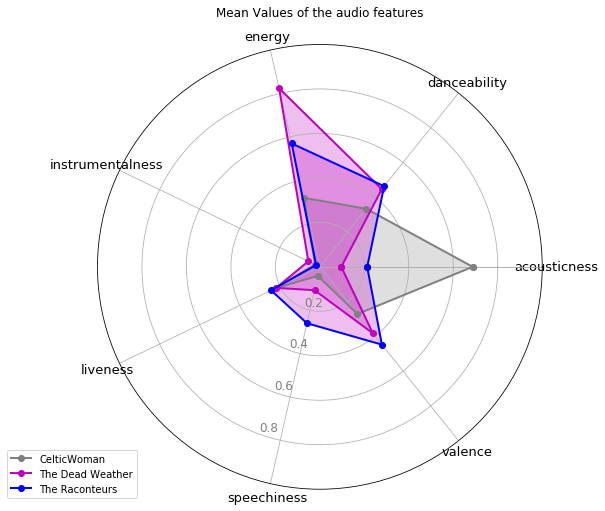

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

labels= list(features_CW)[:]
stats= features_CW.mean().tolist()
stats2 = features_TDW.mean().tolist()
stats3 = features_Rac.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)


stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
stats3 =np.concatenate((stats3,[stats3[0]])) 
angles=np.concatenate((angles,[angles[0]]))


fig= plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "CelticWoman", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "The Dead Weather", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )

ax.plot(angles, stats3, 'o-', linewidth=2, label = "The Raconteurs", color = 'b')
ax.fill(angles, stats3, alpha=0.25, facecolor='m' )

ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))